# Converting photometry table from interactive photometry tool to a light curve

-Example WASP-36 b


Code Improvement notes
- needs ability to remove miss-clicked stars
- a guess for identical psf locations on next frame with ability to edit if they look incorrect
- ^reuse previous aperatures option? 
- update on psf photometry click not next click (prob with last frame)
- start next frame at same zoom level
- Save table to csv
- print statement on interface?
- quality flag button

New Code improvement notes
- still needs save dataframe to csv command
- Dropped observation time column? Not cool 
- still needs an undo star selection option 




In [13]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

Point to reduced data path, or wherever frame_info and photometry results were saved

In [12]:
!pwd

/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw


In [53]:
path = '/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/data/WASP36b/Reduced/'

In [169]:
raw = pd.read_csv(path+'WASP-36B_psf_photometry_results.csv')
raw

,File,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,Star_3_y,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise
0,WASP36B.2025-02-17.0132_reduced.fits,543,406,248148.402715,557.779783,446,362,40612.386019,305.319729,683,441,44869.114796,318.531476,621,527,12626.023127,229.085966
1,WASP36B.2025-02-17.0167_reduced.fits,543,406,256513.007623,565.228176,446,362,43380.393888,311.103249,683,441,48485.998255,324.159196,621,527,13301.144232,225.309209
2,WASP36B.2025-02-17.0135_reduced.fits,543,406,274211.948485,584.095256,446,362,46653.230661,322.557753,683,441,50148.237007,329.143734,621,527,13561.110304,227.642906
3,WASP36B.2025-02-17.0160_reduced.fits,543,406,233516.917499,539.358129,446,362,37853.813946,283.018430,683,441,42223.787733,298.750613,621,527,11160.317601,201.624754
4,WASP36B.2025-02-17.0175_reduced.fits,543,406,242224.270848,550.275288,446,362,39289.320579,292.438668,683,441,43398.192492,305.965164,621,527,11108.539024,203.464616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0188_reduced.fits,543,406,229046.616449,538.908458,446,362,38992.699138,309.169671,683,441,40414.353404,303.685721,621,527,9070.160184,192.271188
60,WASP36B.2025-02-17.0141_reduced.fits,543,406,83713.362506,321.932510,446,362,13122.889213,172.805437,683,441,15151.468492,185.152801,621,527,961.191525,64.416924
61,WASP36B.2025-02-17.0146_reduced.fits,543,406,249355.821825,558.147488,446,362,42161.636095,305.246151,683,441,45031.162137,311.194193,621,527,11164.050994,205.549141
62,WASP36B.2025-02-17.0153_reduced.fits,543,406,252224.571898,562.839790,446,362,43255.089839,313.455104,683,441,46927.769318,320.505645,621,527,12689.407787,222.160788


In [170]:
obs_info = pd.read_csv(path+'frame_info.csv')
obs_info

,Directory,File,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0132_reduced.fits,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
1,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0167_reduced.fits,WASP-36B,2025-02-18T03:15:50.730,R,150.0,9.886016,42.597653,0.053058
2,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0135_reduced.fits,WASP-36B,2025-02-18T01:52:14.432,R,150.0,9.886016,42.597653,0.053058
3,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0160_reduced.fits,WASP-36B,2025-02-18T02:57:57.963,R,150.0,9.886016,42.597653,0.053058
4,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0175_reduced.fits,WASP-36B,2025-02-18T03:36:17.242,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...
59,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0188_reduced.fits,WASP-36B,2025-02-18T04:09:30.453,R,150.0,9.886016,42.597653,0.053058
60,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0141_reduced.fits,WASP-36B,2025-02-18T02:07:33.394,R,150.0,9.886016,42.597653,0.053058
61,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0146_reduced.fits,WASP-36B,2025-02-18T02:21:08.186,R,150.0,9.886016,42.597653,0.053058
62,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0153_reduced.fits,WASP-36B,2025-02-18T02:39:07.041,R,150.0,9.886016,42.597653,0.053058


In [156]:
# obs_info.sort_values(by='Date-Obs')

In [171]:
combined = pd.merge(raw, obs_info, left_on='File', right_on='File', how='left').sort_values(by='Date-Obs').reset_index(drop=True)
combined

,File,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,...,Star_4_flux,Star_4_noise,Directory,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,WASP36B.2025-02-17.0130_reduced.fits,543,406,269123.829527,579.723338,446,362,44145.808018,308.479148,683,...,13716.793845,226.229726,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:39:22.989,R,150.0,9.886016,42.597653,0.053058
1,WASP36B.2025-02-17.0131_reduced.fits,543,406,245665.738029,553.393495,446,362,39730.181127,293.191464,683,...,11916.778045,216.768568,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:41:56.670,R,150.0,9.886016,42.597653,0.053058
2,WASP36B.2025-02-17.0132_reduced.fits,543,406,248148.402715,557.779783,446,362,40612.386019,305.319729,683,...,12626.023127,229.085966,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
3,WASP36B.2025-02-17.0133_reduced.fits,543,406,258959.827193,572.284300,446,362,42982.004513,315.555369,683,...,11538.012409,214.039153,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:47:05.012,R,150.0,9.886016,42.597653,0.053058
4,WASP36B.2025-02-17.0134_reduced.fits,543,406,262429.816955,571.833782,446,362,44111.432070,310.997078,683,...,12990.963777,224.619810,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T01:49:38.284,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0192_reduced.fits,543,406,228942.962620,538.072100,446,362,36314.473724,290.068443,683,...,10527.482852,205.939234,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:19:44.489,R,150.0,9.886016,42.597653,0.053058
60,WASP36B.2025-02-17.0193_reduced.fits,543,406,235092.559142,543.023106,446,362,38377.287587,293.602649,683,...,11125.972738,209.300132,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:22:16.948,R,150.0,9.886016,42.597653,0.053058
61,WASP36B.2025-02-17.0194_reduced.fits,543,406,232781.213398,543.096685,446,362,38836.376536,302.397300,683,...,9822.327161,194.217344,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:24:50.026,R,150.0,9.886016,42.597653,0.053058
62,WASP36B.2025-02-17.0195_reduced.fits,543,406,216491.326660,521.811677,446,362,35109.400078,285.202479,683,...,8640.792191,178.203028,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP-36B,2025-02-18T04:27:22.819,R,150.0,9.886016,42.597653,0.053058


In [172]:
from itertools import product
import pickle

import ipywidgets as ipw
import numpy as np

from matplotlib import pyplot as plt
from astropy.table import Table

from stellarphot.analysis.transit_fitting import TransitModelFit
from stellarphot.visualization.transit_plots import *
from stellarphot.visualization.fits_opener import FitsOpener

from astropy.timeseries import BinnedTimeSeries, TimeSeries, aggregate_downsample
from astropy.time import Time
from astropy.table import Table 
from astropy import units as u

In [174]:
# fo = FitsOpener(title="Select your photometry/flux file", filter_pattern=["*.csv", "*.fits"])

In [175]:
# !pip install packaging==21.3

In [176]:
t =[]
for i in range(len(combined)):
    t.append(Time(combined.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

sorted_indices = np.argsort(t)


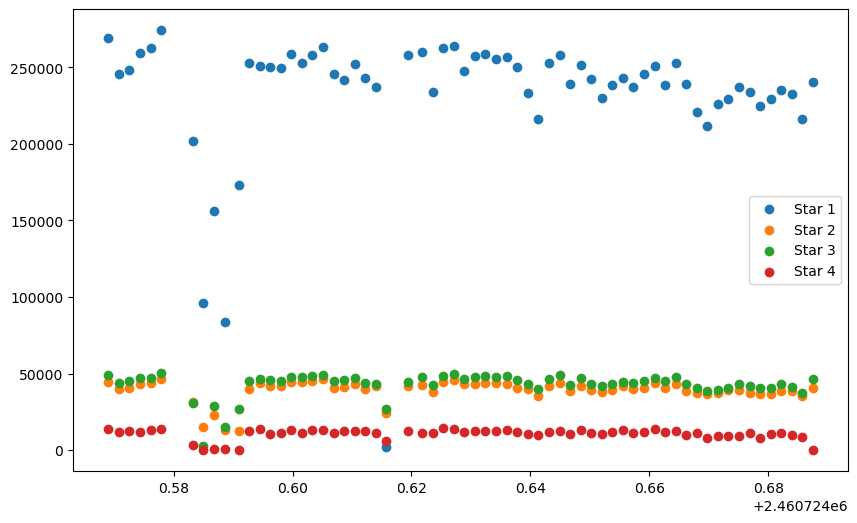

In [177]:
plt.figure(figsize=(10, 6))
# for i in [0,1,2,3,4,5,6,7,]:
for i in [0,1,2,3,]:
    plt.scatter(t,combined[f'Star_{i+1}_flux'],label=f'Star {i+1}')
    # print(i)
# plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
# [plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
    plt.legend()    

In [203]:
# refs = [6,7,8]
refs = [2,3,4]
# refs = [4,5,6,7,8]
ref_flux = np.array([combined[f'Star_{i}_flux'].values for i in refs])
ref_err = np.sqrt(np.sum(np.array([combined[f'Star_{i}_noise'].values**2 for i in refs]),axis=0))
ref_corr = ref_flux.sum(axis=0)/len(refs)

In [204]:
wasp36_flux = combined['Star_1_flux'] / ref_corr
wasp36_err = np.abs(wasp36_flux)*np.sqrt((combined['Star_1_noise']/combined['Star_1_flux'])**2 + (ref_err/ref_corr)**2)

In [205]:
# Sort wasp36_flux and t by time order
sorted_indices = np.argsort(t)
wasp36_flux_sorted = wasp36_flux.values[sorted_indices]
wasp36_err_sorted = wasp36_err.values[sorted_indices]
t_sorted = np.array(t)[sorted_indices]

In [206]:
wasp36_err

0     0.107671
1     0.116874
2     0.116610
3     0.114255
4     0.110059
        ...   
59    0.126804
60    0.118310
61    0.123150
62    0.132698
63    0.128896
Length: 64, dtype: float64

(0.9, 1.2)

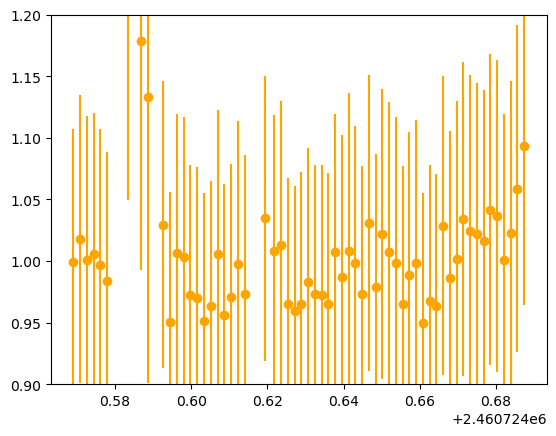

In [207]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t_sorted, wasp36_flux_sorted/np.nanmedian(wasp36_flux_sorted), 
             yerr=wasp36_err_sorted, 
             fmt='o', color='orange', label='WASP-36b error')
plt.ylim(0.9,1.2) 
# plt.ylim(0.75,2)

(0.0, 2.5)

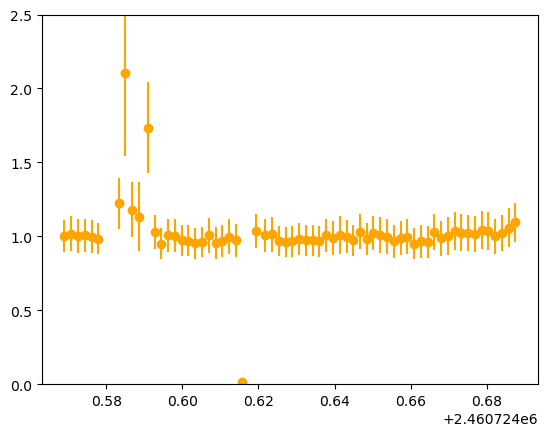

In [208]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t, wasp36_flux/np.nanmedian(wasp36_flux), 
             yerr=wasp36_err, 
             fmt='o', color='orange', label='WASP-36b error')
# plt.ylim(0.9,1.1) 
# plt.ylim(0.75,2)
plt.ylim(0,2.5)

(0.9, 1.2)

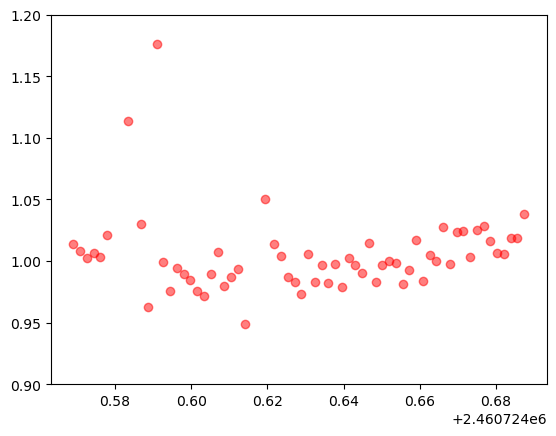

In [32]:
plt.scatter(t_sorted, wasp36_flux_sorted/np.median(wasp36_flux_sorted), label='WASP-36b flux correction (sorted)', color='red', alpha=0.5)
plt.ylim(0.9,1.2) 